#Create the environment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [4]:
import pandas as pd
import xarray as xr
import numpy as np

#Our class
from create_dataset.make_dataset import CustomDataset

#Create the NOX dataset

I want to apply the following changes to the dataset:
*   cut_region function: the dataset contains a larger region than the one we are analyzing, so we proceed to eliminate the excess area
*   rescale function: we change the scale of the dataset from 0.75 degree to 0.25 degree
*   resample function: we create a time series with an hourly frequency

Extremes of the region that we are analyzing:

In [5]:
lat_s = 43.0
lat_n = 51.0
lon_e =  4.0
lon_w = 12.0

Here we load the dataset

In [6]:
NOX_instance = CustomDataset('Data/MAY_HOURLY_2019_NOX_reduced.nc')
NOX_instance.get_dataset()

Opening dataset at :  Data/MAY_HOURLY_2019_NOX_reduced.nc
Done!


<xarray.Dataset>
Dimensions:         (latitude: 82, longitude: 82, time: 720)
Coordinates:
  * longitude       (longitude) float64 4.0 4.1 4.2 4.3 ... 11.8 11.9 12.0 12.1
  * latitude        (latitude) float64 51.05 50.95 50.85 ... 43.15 43.05 42.95
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             int32 ...
    EMISSIONS_2019  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

Here we applay the functions

In [7]:
NOX_instance.cut_region(lat_n, lat_s, lon_e, lon_w)
NOX_instance.rescale()
NOX_instance.resample("1H")
NOX_Dataset = NOX_instance.get_dataset()
NOX_Dataset

<xarray.Dataset>
Dimensions:         (latitude: 33, longitude: 33, time: 720)
Coordinates:
  * latitude        (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude       (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             int32 -2147483647
    EMISSIONS_2019  (time, latitude, longitude) float64 1.15e-12 ... 1.858e-11
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

We delete the crs variable which is useless

In [8]:
NOX_Dataset = NOX_Dataset.drop_vars('crs')
NOX_Dataset

<xarray.Dataset>
Dimensions:         (latitude: 33, longitude: 33, time: 720)
Coordinates:
  * latitude        (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude       (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    EMISSIONS_2019  (time, latitude, longitude) float64 1.15e-12 ... 1.858e-11
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

#Load weather dataset

In [9]:
weather_dataset = xr.open_dataset('Data/05_2019_weather.nc')
weather_dataset

<xarray.Dataset>
Dimensions:    (latitude: 33, longitude: 33, time: 742)
Coordinates:
  * latitude   (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude  (longitude) float64 4.0 4.25 4.5 4.75 ... 11.25 11.5 11.75 12.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/14)
    u10        (time, latitude, longitude) float64 ...
    v10        (time, latitude, longitude) float64 ...
    hcc        (time, latitude, longitude) float64 ...
    lcc        (time, latitude, longitude) float64 ...
    tcc        (time, latitude, longitude) float64 ...
    cvl        (time, latitude, longitude) float64 ...
    ...         ...
    tmp        (time, latitude, longitude) float64 ...
    sp_hum     (time, latitude, longitude) float64 ...
    rel_hum    (time, latitude, longitude) float64 ...
    tcwv       (time, latitude, longitude) float64 ...
    tcw        (time, latitude, longitude) float64 ...
    tot_wind   (time, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-12 11:43:08 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

#Togheter NO and weather

In [10]:
 dataset_togheter = NOX_Dataset.merge(weather_dataset)
 dataset_togheter

<xarray.Dataset>
Dimensions:         (latitude: 33, longitude: 33, time: 742)
Coordinates:
  * time            (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
  * latitude        (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude       (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables: (12/15)
    EMISSIONS_2019  (time, latitude, longitude) float64 nan nan nan ... nan nan
    u10             (time, latitude, longitude) float64 ...
    v10             (time, latitude, longitude) float64 ...
    hcc             (time, latitude, longitude) float64 ...
    lcc             (time, latitude, longitude) float64 ...
    tcc             (time, latitude, longitude) float64 ...
    ...              ...
    tmp             (time, latitude, longitude) float64 ...
    sp_hum          (time, latitude, longitude) float64 ...
    rel_hum         (time, latitude, longitude) float64 ...
    tcwv            (time, latitude, longitude) float64 ...
    tcw             (time, latitude, longitude) float64 ...
    tot_wind        (time, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

We make some checks

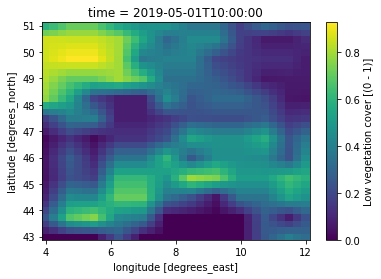

In [11]:
dataset_togheter.isel(time=[10]).cvl.plot()

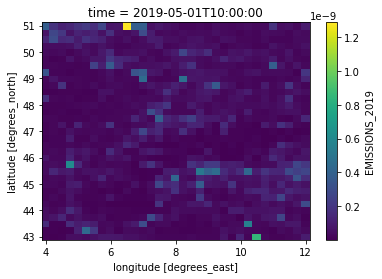

In [12]:
dataset_togheter.isel(time=[10]).EMISSIONS_2019.plot()

#Save dataset

In [13]:
dataset_togheter.to_netcdf('Data/05_2019_weather_and_NOX.nc', 'w', 'NETCDF4')